# Water Quality prediction

In [1]:
import pandas as pd

In [2]:
water=pd.read_csv("E://Datasets//water_potability.csv")
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# 1] pH - WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.
 # The current investigation ranges were 6.52–6.83 which are in the range of WHO standards
    
# 2] Hardness - Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

# 3] Solids - Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
# (TDS total dissolved solid)

# 4] Chloromines - Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

# 5] Sulphate - It ranges from 3 to 30 mg/L in most freshwater supplies,
# although much higher concentrations (1000 mg/L) are found in some geographic locations.

# 6] Conductivity - According to WHO standards, EC value should not exceeded 400 μS/cm.

# 7] Organic_carbon -  According to US EPA < 2 mg/L as TOC in treated / drinking water, 
 # and < 4 mg/Lit in source water which is use for treatment.
    
# 8] Trihalomethanes -  THM levels up to 80 ppm is considered safe in drinking water.

# 9] Turbidity - The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

# 1 means Potable and 0 means Not potable.

In [3]:
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [4]:
water.shape

(3276, 10)

In [5]:
water.size

32760

In [6]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [7]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Check null value

In [8]:
import numpy as np

In [9]:
water=water.drop_duplicates()
water.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [10]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
water["ph"].median()

7.036752103833548

In [12]:
water["ph"]=water["ph"].fillna(water["ph"].median())

In [13]:
water["Sulfate"].mean()

333.77577661081335

In [16]:
water["Sulfate"]=water["Sulfate"].fillna(water["Sulfate"].mean())

In [15]:
water["Trihalomethanes"].median()

66.62248509808484

In [17]:
water["Trihalomethanes"]=water["Trihalomethanes"].fillna(water["Trihalomethanes"].median())

In [18]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Now Data is clean 

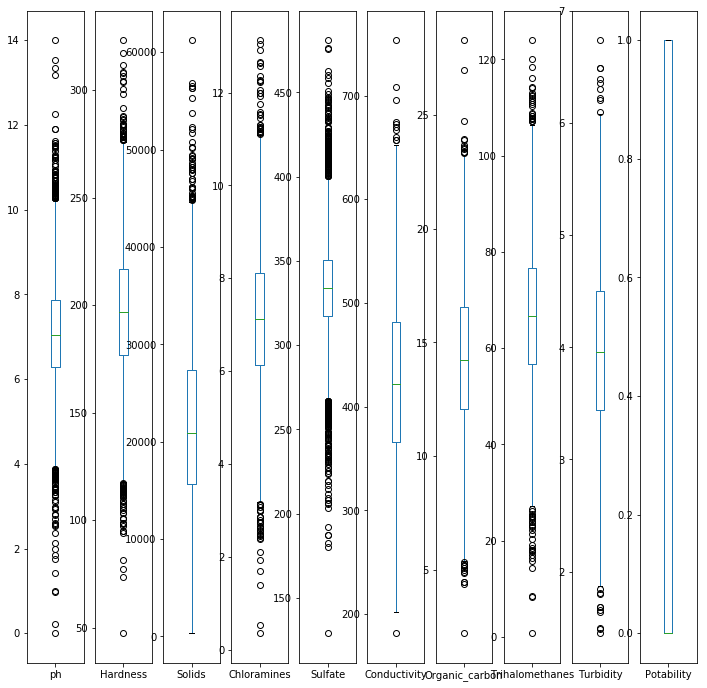

In [20]:
water.plot(kind="box",figsize=(12,12),subplots=True);

In [21]:
# Remove Outliers

for col in water.columns:
    if col not in ['Potability']:
        water=water[water[col] < water[col].quantile(0.999)]
        water=water[water[col] > water[col].quantile(0.01)]

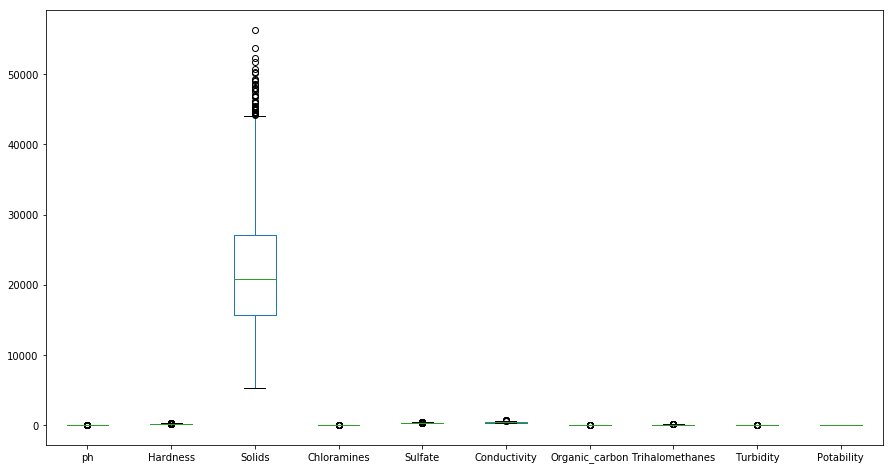

In [22]:
water.plot(kind="box",grid=False,figsize=(15,8));

In [23]:
# MinMax

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler().fit(water[water.columns.difference(['Potability'])])
minmax=scalar.transform(water[water.columns.difference(['Potability'])])
minmax_df = pd.DataFrame(minmax,columns=[water[water.columns.difference(['Potability'])].columns])
models_scores=pd.DataFrame()

In [24]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000
mean,7.109862,196.756199,21945.441053,7.149528,334.894940,427.679294,14.383906,66.889288,3.986919,0.383965
std,1.362331,30.663003,8348.030984,1.485621,33.072642,78.835840,3.161725,15.030262,0.749484,0.486432
min,3.445062,114.733545,5232.913254,3.239580,240.936722,269.817539,6.580402,28.682952,2.165682,0.000000
25%,6.332913,177.475966,15715.740730,6.178729,318.371633,368.059127,12.180205,57.271970,3.454113,0.000000
50%,7.036752,196.812126,20882.160702,7.130299,333.775777,422.452269,14.267559,66.622485,3.962502,0.000000
75%,7.875127,215.969399,27093.667258,8.096292,350.434528,482.446752,16.579756,76.988603,4.504922,1.000000
max,12.246928,306.627481,56320.586979,12.626900,447.417962,672.556999,23.917601,114.208671,6.389161,1.000000


In [25]:
3276 - 2956

320

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

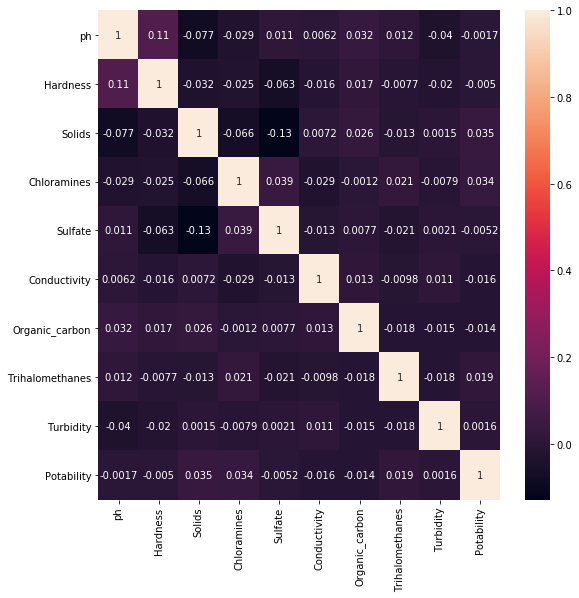

In [27]:
plt.figure(figsize=(9,9))
sns.heatmap(water.corr(),annot=True);

In [28]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108893,-0.076905,-0.028847,0.011326,0.006214,0.032160,0.012169,-0.040143,-0.001703
Hardness,0.108893,1.000000,-0.031989,-0.024961,-0.062895,-0.015825,0.016763,-0.007691,-0.019684,-0.004999
Solids,-0.076905,-0.031989,1.000000,-0.066256,-0.128906,0.007241,0.025999,-0.013269,0.001484,0.034616
Chloramines,-0.028847,-0.024961,-0.066256,1.000000,0.038728,-0.028664,-0.001179,0.021051,-0.007897,0.034074
Sulfate,0.011326,-0.062895,-0.128906,0.038728,1.000000,-0.012529,0.007707,-0.020774,0.002060,-0.005212
Conductivity,0.006214,-0.015825,0.007241,-0.028664,-0.012529,1.000000,0.012574,-0.009845,0.011405,-0.016290
Organic_carbon,0.032160,0.016763,0.025999,-0.001179,0.007707,0.012574,1.000000,-0.018230,-0.015287,-0.014298
Trihalomethanes,0.012169,-0.007691,-0.013269,0.021051,-0.020774,-0.009845,-0.018230,1.000000,-0.017638,0.019002
Turbidity,-0.040143,-0.019684,0.001484,-0.007897,0.002060,0.011405,-0.015287,-0.017638,1.000000,0.001613
Potability,-0.001703,-0.004999,0.034616,0.034074,-0.005212,-0.016290,-0.014298,0.019002,0.001613,1.000000


# Separate Data

In [29]:
x = water.drop("Potability",axis=1)
y = water["Potability"]

In [30]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [31]:
x.shape

(2956, 9)

In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [33]:
y.shape

(2956,)

In [34]:
water.Potability.value_counts()

0    1821
1    1135
Name: Potability, dtype: int64

In [35]:
water.Potability.unique()

array([0, 1], dtype=int64)

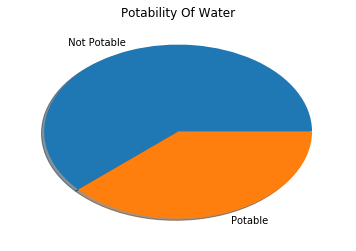

In [36]:
p = np.array([1821,1135])
mylabels= [" Not Potable","Potable"]
plt.pie(p,labels=mylabels,shadow=True)
plt.title("Potability Of Water")
plt.show()

# Train Test_Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [46]:
x_train.shape,x_test.shape

((2069, 9), (887, 9))

In [47]:
y_train.shape,y_test.shape

((2069,), (887,))

In [48]:
x_train.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1936,7.036752,165.892970,11566.875548,8.326155,333.775777,369.289777,7.401868,66.686950,3.603090
2374,4.740057,176.655631,24069.335915,4.013444,367.805016,288.221298,13.204220,77.880375,5.467936


In [49]:
x_test.head(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
401,8.596391,189.523161,14518.974501,5.124129,422.990413,348.041489,17.358071,66.622485,3.519884
2698,4.858056,159.695554,32886.528899,7.689305,333.775777,337.388035,23.108016,76.094469,4.130972


In [50]:
y_train.head(2)

1936    1
2374    1
Name: Potability, dtype: int64

In [51]:
y_test.head(2)

401     1
2698    0
Name: Potability, dtype: int64

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
l_model=LogisticRegression()

In [54]:
l_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
l_ypred=l_model.predict(x_test)
l_ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
l_model.score(x_test,y_test)

0.5862457722660653

In [57]:
l=accuracy_score(l_ypred,y_test)
l

0.5862457722660653

In [58]:
confusion_matrix(l_ypred,y_test)

array([[519, 367],
       [  0,   1]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(l_ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       886
           1       0.00      1.00      0.01         1

    accuracy                           0.59       887
   macro avg       0.50      0.79      0.37       887
weighted avg       1.00      0.59      0.74       887



# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dc_model=DecisionTreeClassifier()

In [63]:
dc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
dc_ypred=dc_model.predict(x_test)
dc_ypred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [65]:
dc_model.score(x_test,y_test)

0.5670800450958287

In [66]:
d=accuracy_score(dc_ypred,y_test)
d

0.5670800450958287

In [67]:
confusion_matrix(dc_ypred,y_test)

array([[339, 204],
       [180, 164]], dtype=int64)

In [68]:
print(classification_report(dc_ypred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64       543
           1       0.45      0.48      0.46       344

    accuracy                           0.57       887
   macro avg       0.55      0.55      0.55       887
weighted avg       0.57      0.57      0.57       887



In [68]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [64]:
features_names = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
class_names = ["0","1"]

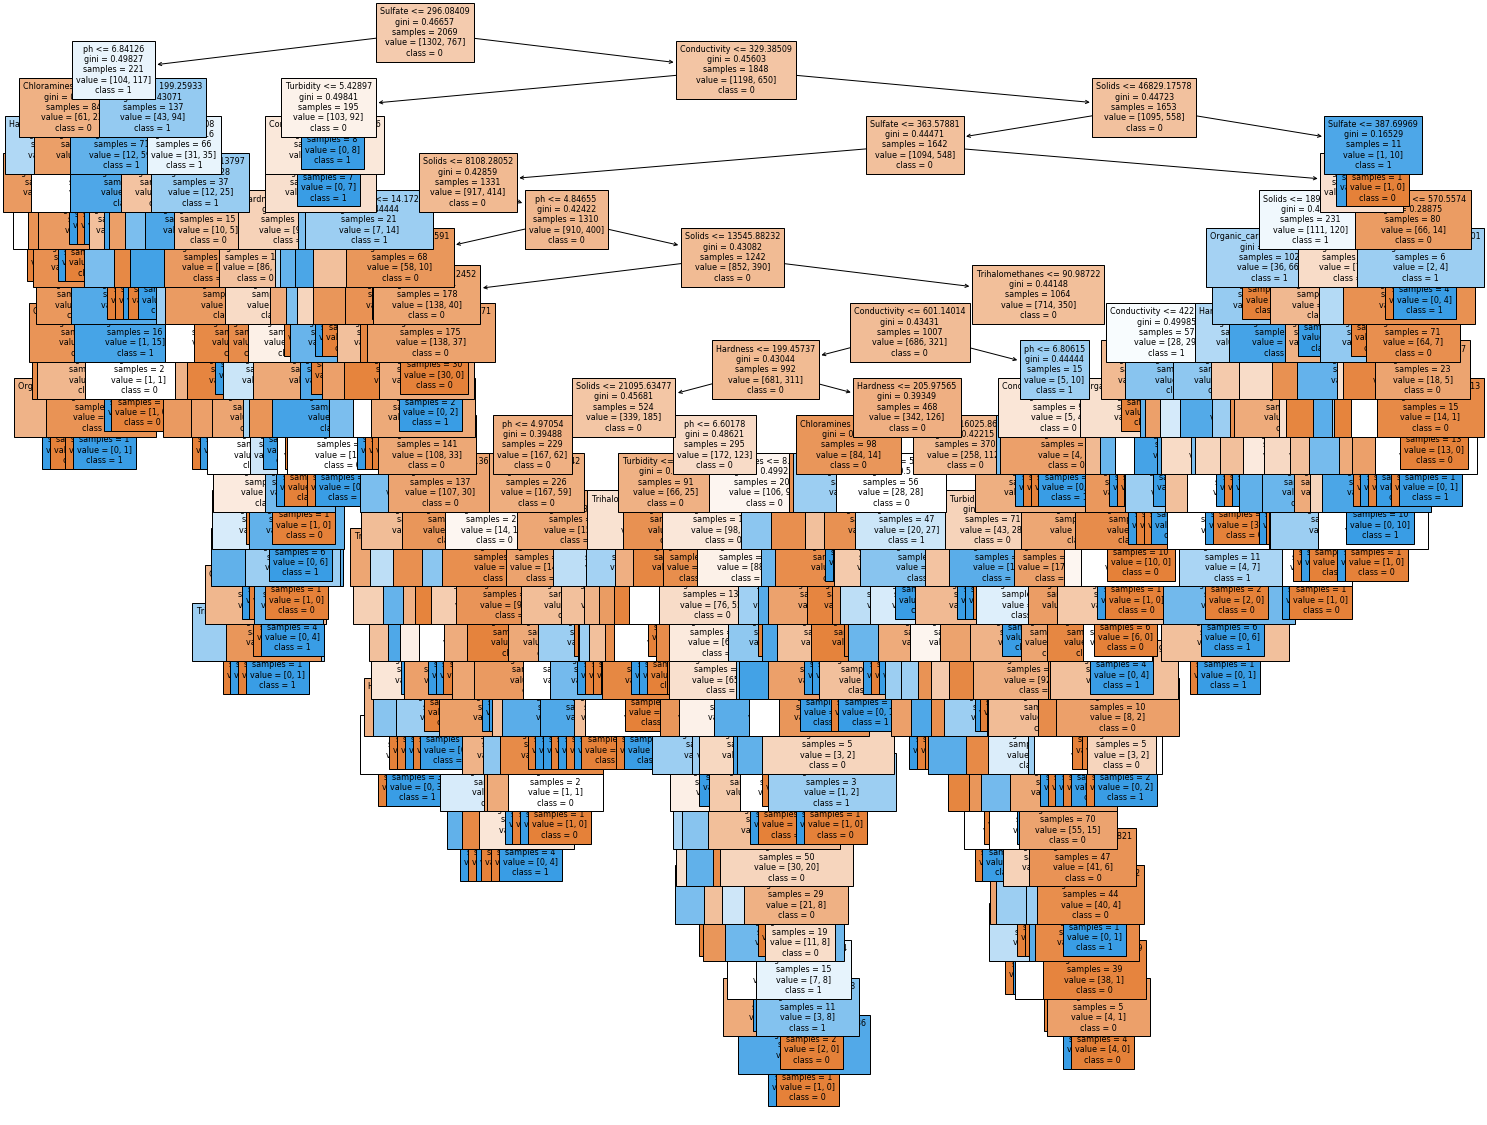

In [69]:
plt.figure(figsize = (25,20))
a=plot_tree(dc_model,
               feature_names = features_names,
               class_names = ["0", "1"],
               filled = True,
               fontsize=8,
               precision = 5)
plt.show()

# KNeighbours Classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
kn_model=KNeighborsClassifier()

In [71]:
kn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [72]:
kn_ypred=kn_model.predict(x_test)
kn_ypred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [73]:
kn_model.score(x_test,y_test)

0.5558060879368658

In [74]:
k=accuracy_score(kn_ypred,y_test)
k

0.5558060879368658

In [75]:
confusion_matrix(kn_ypred,y_test)

array([[403, 278],
       [116,  90]], dtype=int64)

In [76]:
print(classification_report(kn_ypred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       681
           1       0.24      0.44      0.31       206

    accuracy                           0.56       887
   macro avg       0.51      0.51      0.49       887
weighted avg       0.65      0.56      0.59       887



# Naive Bayes Algorithm

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
g_model=GaussianNB()

In [79]:
g_model.fit(x_train,y_train)

GaussianNB()

In [80]:
g_ypred=g_model.predict(x_test)
g_ypred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [81]:
g_model.score(x_test,y_test)

0.5997745208568207

In [82]:
n=accuracy_score(g_ypred,y_test)
n

0.5997745208568207

In [83]:
confusion_matrix(g_ypred,y_test)

array([[470, 306],
       [ 49,  62]], dtype=int64)

In [84]:
print(classification_report(g_ypred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73       776
           1       0.17      0.56      0.26       111

    accuracy                           0.60       887
   macro avg       0.54      0.58      0.49       887
weighted avg       0.81      0.60      0.67       887



# Support Vector Machine

In [85]:
from sklearn.svm import SVC

In [86]:
s_model=SVC()

In [87]:
s_model.fit(x_train,y_train)

SVC()

In [88]:
s_ypred=s_model.predict(x_test)
s_ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [89]:
s_model.score(x_test,y_test)

0.5851183765501691

In [90]:
s=accuracy_score(s_ypred,y_test)
s

0.5851183765501691

In [91]:
confusion_matrix(s_ypred,y_test)

array([[519, 368],
       [  0,   0]], dtype=int64)

In [92]:
print(classification_report(s_ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74       887
           1       0.00      0.00      0.00         0

    accuracy                           0.59       887
   macro avg       0.50      0.29      0.37       887
weighted avg       1.00      0.59      0.74       887



C:\Users\pcc\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcc\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcc\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Model

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model=RandomForestClassifier()

In [95]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
rf_ypred=rf_model.predict(x_test)
rf_ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
rf_model.score(x_test,y_test)

0.6279594137542277

In [98]:
r=accuracy_score(rf_ypred,y_test)
r

0.6279594137542277

In [99]:
confusion_matrix(rf_ypred,y_test)

array([[455, 266],
       [ 64, 102]], dtype=int64)

In [100]:
print(classification_report(rf_ypred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.63      0.73       721
           1       0.28      0.61      0.38       166

    accuracy                           0.63       887
   macro avg       0.58      0.62      0.56       887
weighted avg       0.76      0.63      0.67       887



# Gradient Boosting Algorithm

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
gb_model=GradientBoostingClassifier()

In [103]:
gb_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [104]:
gb_ypred=gb_model.predict(x_test)
gb_ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [105]:
gb_model.score(x_test,y_test)

0.6144306651634723

In [106]:
g=accuracy_score(gb_ypred,y_test)
g

0.6144306651634723

In [107]:
confusion_matrix(gb_ypred,y_test)

array([[467, 290],
       [ 52,  78]], dtype=int64)

In [108]:
print(classification_report(gb_ypred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73       757
           1       0.21      0.60      0.31       130

    accuracy                           0.61       887
   macro avg       0.56      0.61      0.52       887
weighted avg       0.80      0.61      0.67       887



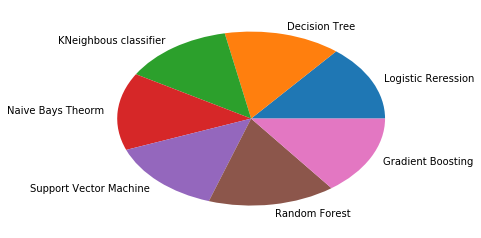

In [163]:
accuracy = np.array([0.586245,0.588500,0.555806,0.599774,0.585118,0.640360,0.615558])
label = ["Logistic Reression","Decision Tree","KNeighbous classifier","Naive Bays Theorm","Support Vector Machine","Random Forest","Gradient Boosting"]
plt.pie(accuracy,labels=label);

In [109]:
print("Logistic Regression ",l)
print("Decision Tree ",d)
print("KNeighbous classifier ",k)
print("Naive Bays Theorm ",n)
print("Support Vector Machine ",s)
print("Random Forest ",r)
print("Gradient Boosting ",g)

Logistic Regression  0.5862457722660653
Decision Tree  0.5670800450958287
KNeighbous classifier  0.5558060879368658
Naive Bays Theorm  0.5997745208568207
Support Vector Machine  0.5851183765501691
Random Forest  0.6279594137542277
Gradient Boosting  0.6144306651634723


# Building a model

In [110]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [113]:
ph = float(input("ph of water - "))                                # 6.52 to 8.5
Hardness = float(input("Hardness of water - "))                    # hardness should not exceed 0-120 to 170 mg/L 
Solids= float(input("Solids in water - "))                         # 500 mg/l & max 1000 mg/l
Chloramines = float(input("Chloramines in water - "))              # per litre 4 mg/l
Sulfate = float(input("Sulfate in water - "))                      # lower than 500 mg/l
Conductivity = float(input("Conductivity of water - "))            # 200 μS/cm - 400 μS/cm  
Organic_carbon =  float(input("Organic Carbon in water - "))       # EPA < 2 mg/L as TOC in treated   
Trihalomethanes = float(input("Trihalomethanes of water-  "))      # not exceed 100 μg/L
Turbidity = float(input("Turbidity of water - "))                  # not exceed 5 NTU


Output = np.array([ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity])
Output.reshape(1,-1)


Potability = rf_model.predict([Output]) 

if Potability == 1:
     print("Water is  drinkable")
else:
     print("water is not drinkable")                           

ph of water - 6.923636
Hardness of water - 260.593154
Solids in water - 24792.525623
Chloramines in water - 5.501164
Sulfate in water - 332.232177
Conductivity of water - 607.773567
Organic Carbon in water - 15.483027
Trihalomethanes of water-  51.535867
Turbidity of water - 4.013339
Water is  drinkable


C:\Users\pcc\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Done